In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

sns.set(style="whitegrid")


In [35]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


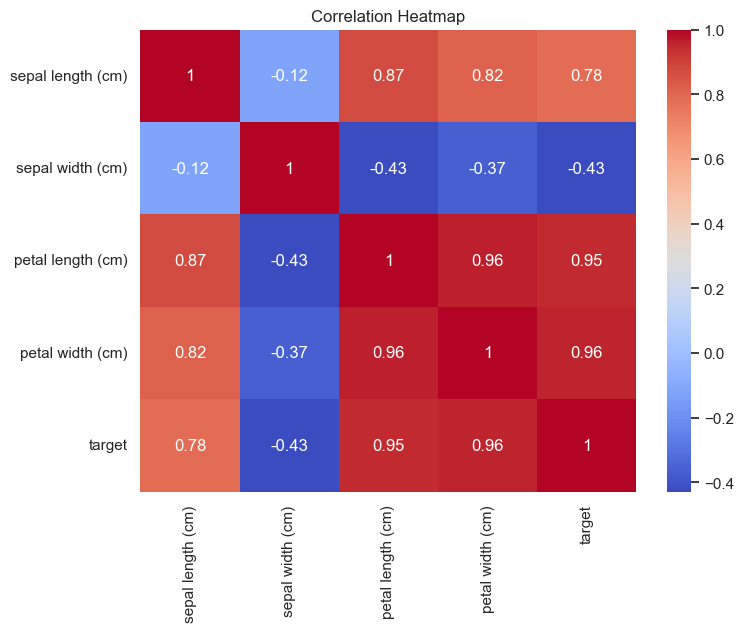

In [36]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


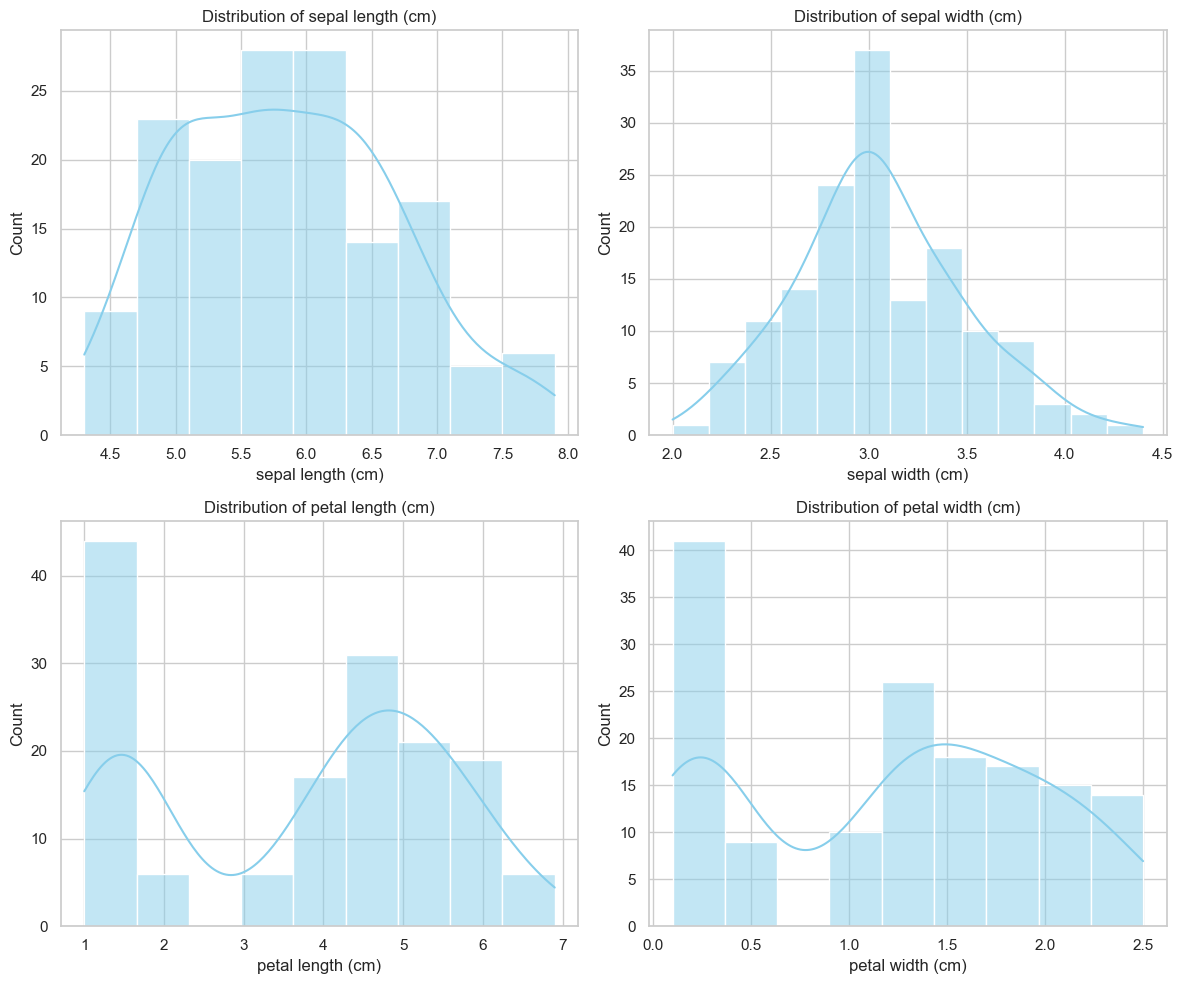

In [37]:
features = df.columns[:-1]
plt.figure(figsize=(12, 10))
for i, col in enumerate(features):
    plt.subplot(2, 2, i+1)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


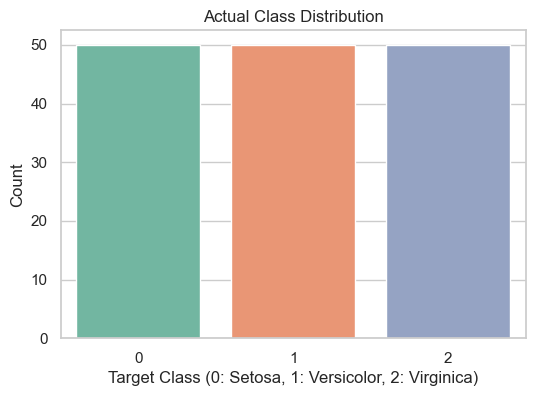

In [38]:
plt.figure(figsize=(6,4))
sns.countplot(x='target', data=df, palette='Set2')
plt.title("Actual Class Distribution")
plt.xlabel("Target Class (0: Setosa, 1: Versicolor, 2: Virginica)")
plt.ylabel("Count")
plt.show()


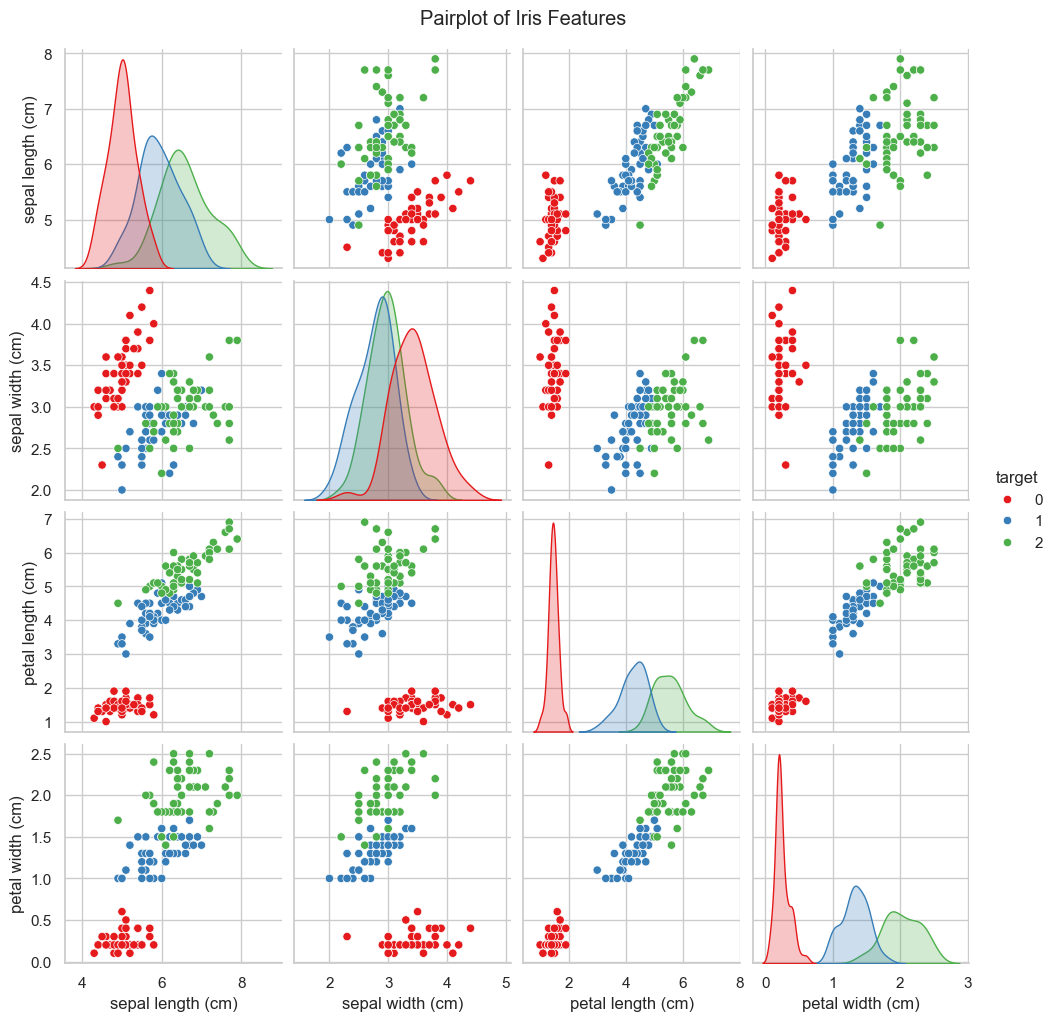

In [39]:
sns.pairplot(df, hue='target', palette='Set1')
plt.suptitle("Pairplot of Iris Features", y=1.02)
plt.show()


In [40]:
x = df.drop(columns=['target'], axis=1)
scaler = StandardScaler()
scaler_data = scaler.fit_transform(x)


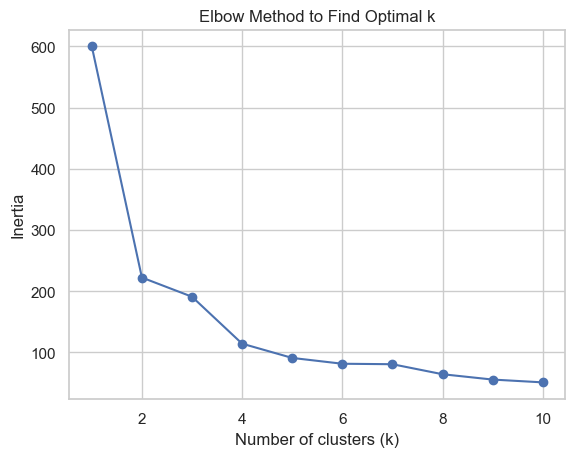

In [41]:
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaler_data)
    inertia.append(kmeans.inertia_)

plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method to Find Optimal k')
plt.grid(True)
plt.show()


In [42]:
# Apply KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(scaler_data)  # use x_scaled, not scaler_data if x_scaled is already defined
df['Cluster'] = clusters


In [44]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(df['target'], df['Cluster'])
print("Confusion Matrix:\n", conf_matrix)

# Define cluster-to-species mapping manually
cluster_to_species = {
    0: "Versicolor",
    1: "Virginica",
    2: "Setosa",
    3: "Unknown"
}
joblib.dump(cluster_to_species, "cluster_mapping.joblib")


Confusion Matrix:
 [[ 0 28 22  0]
 [12  0  0 38]
 [39  0  0 11]
 [ 0  0  0  0]]


['cluster_mapping.joblib']

In [45]:
score = silhouette_score(scaler_data, df["Cluster"])
print(f"Silhouette Score: {score:.3f}")


Silhouette Score: 0.385


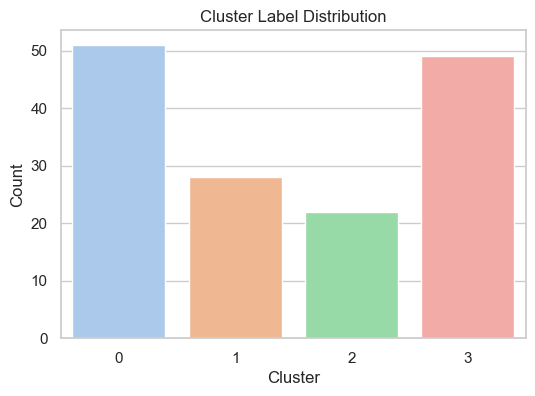

In [46]:
plt.figure(figsize=(6,4))
sns.countplot(x='Cluster', data=df, palette='pastel')
plt.title("Cluster Label Distribution")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.show()


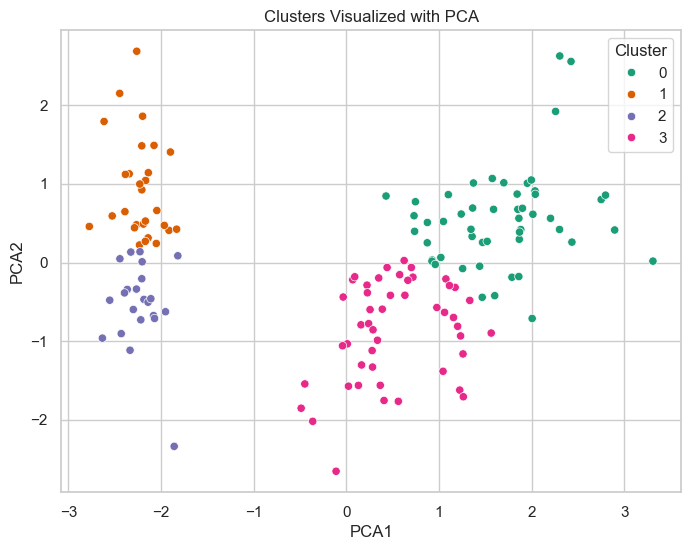

In [47]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaler_data)
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

plt.figure(figsize=(8,6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', palette='Dark2', data=df)
plt.title("Clusters Visualized with PCA")
plt.show()


In [48]:
import joblib
joblib.dump(kmeans, "kmeans_model.joblib")
joblib.dump(scaler, "scaler.joblib")


['scaler.joblib']